# GISTEMP 5.0

## Intro to GISTEMP:
Surface air temperature change is a primary measure of global climate change. The GISTEMP project started in the late 1970s to provide an estimate of the changing global surface air temperature which could be compared with the estimates obtained from climate models simulating the effect of changes in atmospheric carbon dioxide, volcanic aerosols, and solar irradiance.The continuing analysis updates global temperature change from the late 1800s to the present. The last major update of the GISTEMP codebase occurred in 2011 to convert the original code from Fortran to Python. Since then, many of the relevant libraries and development standards have evolved.

### Global Surface Temperature Anomalies:

In [19]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import pandas as pd

In [24]:
# Load GISTEMP data
file = "gistemp1200_GHCNv4_ERSSTv5.nc"

combined_temp_ds = xr.open_dataset(file)

ds_latest_month = combined_temp_ds.sel(time = combined_temp_ds.time[-1])

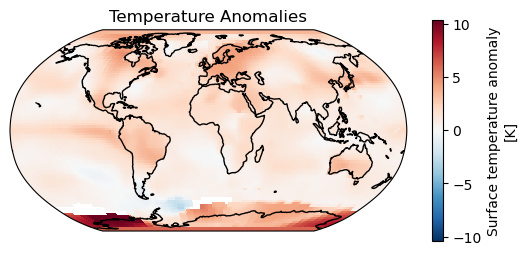

In [25]:
fig, ax = plt.subplots(subplot_kw = {'projection': ccrs.Robinson()})
ds_latest_month.tempanomaly.plot(transform = ccrs.PlateCarree(), cbar_kwargs={'shrink':0.6})

ax.coastlines()

ax.set_title('Temperature Anomalies')

plt.show()

### Seasonal Changes in Temperature Anomaly:

In [26]:
import xarray as xr
import seaborn as sns
import matplotlib.pyplot as pl

In [27]:
# Load GISTEMP data
file = "gistemp1200_GHCNv4_ERSSTv5.nc"
combined_temp_ds = xr.open_dataset(file)

In [28]:
# Extract the temperature data for a specific location 
temperature_data = combined_temp_ds['tempanomaly'].sel(lat=0, lon=0, method='nearest')

# Resample the data to a seasonal frequency, with seasons starting in December
temperature_data_resampled = temperature_data.resample(time='Q-DEC').mean()

# Convert the resampled temperature data to a Pandas DataFrame
temperature_df = temperature_data_resampled.to_dataframe(name='Temperature Anomaly')

# Reset the index to make 'time' a column
temperature_df.reset_index(inplace=True)

In [29]:
# Extract the season and year from the 'time' column
temperature_df['Season'] = temperature_df['time'].dt.strftime('%B')
temperature_df['Year'] = temperature_df['time'].dt.year

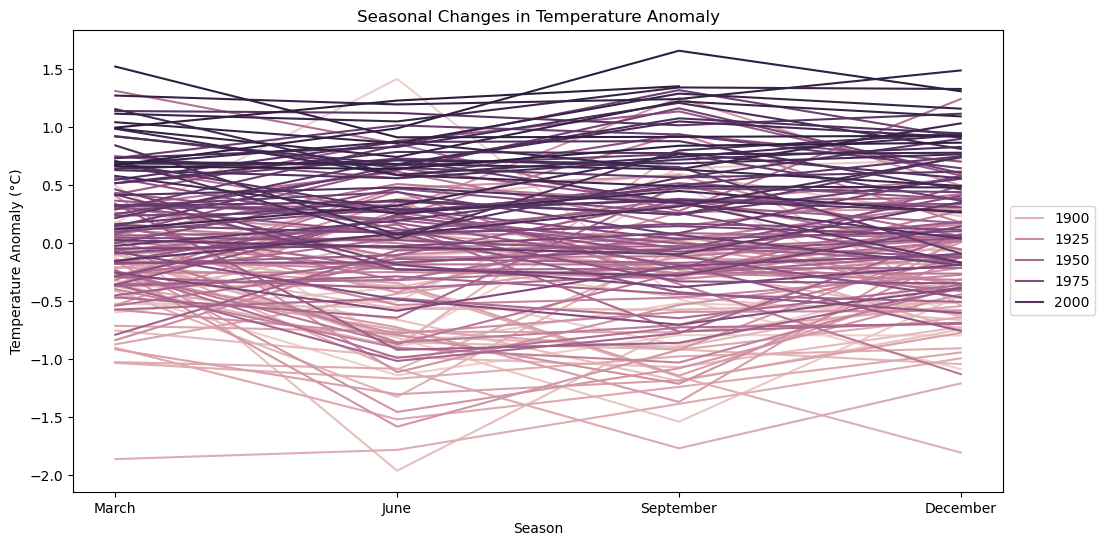

In [30]:
# Plot the seasonal changes using seaborn
plt.figure(figsize=(12, 6))
sns.lineplot(x='Season', y='Temperature Anomaly', hue='Year', data=temperature_df)
plt.title('Seasonal Changes in Temperature Anomaly')
plt.xlabel('Season')
plt.ylabel('Temperature Anomaly (°C)')

# Place legend to the right
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()

### Annual Mean Temperature Over Years:

In [31]:
import os
import pandas as pd

# Load GISTEMP data
file = "parameters/GLB.Ts+dSST.csv"
combined_temp_df = pd.read_csv(file)

In [32]:
import pandas as pd
import matplotlib.pyplot as plt

In [33]:
# Specify the path to your data file
file_path = 'parameters/GLB.Ts+dSST.csv' 

# Read the data from the file into a Pandas DataFrame
df = pd.read_csv(file_path, skiprows=[0])

In [36]:
# Calculate the annual mean temperature
df['Annual_Mean'] = df.iloc[:, 1:13].mean(axis=1)

C:\Users\schandr8\AppData\Local\Temp\1\ipykernel_15488\1281447252.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df['Annual_Mean'] = df.iloc[:, 1:13].mean(axis=1)


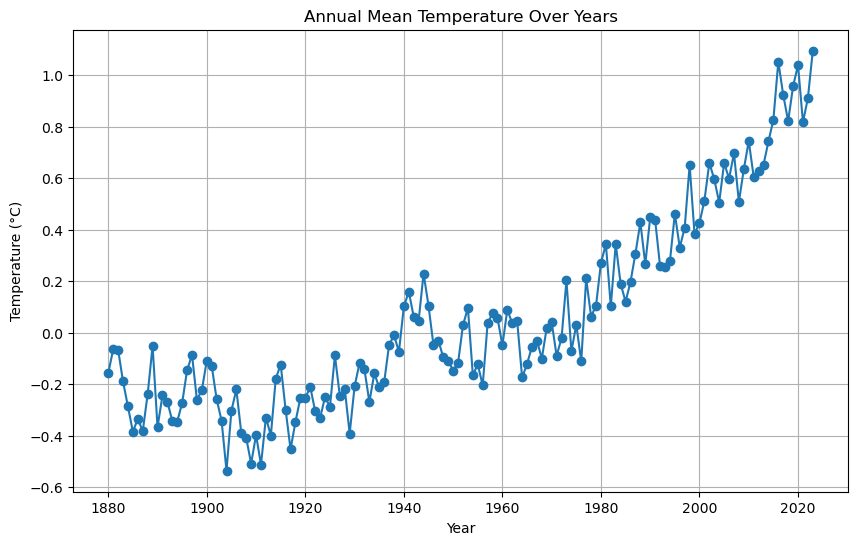

In [37]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(df['Year'], df['Annual_Mean'], marker='o', linestyle='-')
plt.title('Annual Mean Temperature Over Years')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.grid(True)
plt.show()

### Annual Mean Temperature Change Over Three Latitude Bands:

In [38]:
import xarray as xr
import matplotlib.pyplot as plt

In [39]:
# Load GISTEMP data
file = "gistemp1200_GHCNv4_ERSSTv5.nc"
combined_temp_ds = xr.open_dataset(file)

In [40]:
# Display available variables in the dataset
print(combined_temp_ds)

# Extract annual mean temperature over three latitude bands
latitude_bands = [
    combined_temp_ds['tempanomaly'].sel(lat=slice(-90, -30)).mean(dim=['lat', 'lon']),
    combined_temp_ds['tempanomaly'].sel(lat=slice(-30, 30)).mean(dim=['lat', 'lon']),
    combined_temp_ds['tempanomaly'].sel(lat=slice(30, 90)).mean(dim=['lat', 'lon']),
]

<xarray.Dataset>
Dimensions:      (lat: 90, lon: 180, time: 1725, nv: 2)
Coordinates:
  * lat          (lat) float32 -89.0 -87.0 -85.0 -83.0 ... 83.0 85.0 87.0 89.0
  * lon          (lon) float32 -179.0 -177.0 -175.0 -173.0 ... 175.0 177.0 179.0
  * time         (time) datetime64[ns] 1880-01-15 1880-02-15 ... 2023-09-15
Dimensions without coordinates: nv
Data variables:
    time_bnds    (time, nv) datetime64[ns] ...
    tempanomaly  (time, lat, lon) float32 ...
Attributes:
    title:        GISTEMP Surface Temperature Analysis
    institution:  NASA Goddard Institute for Space Studies
    source:       http://data.giss.nasa.gov/gistemp/
    Conventions:  CF-1.6
    history:      Created 2023-10-11 11:54:46 by SBBX_to_nc 2.0 - ILAND=1200,...


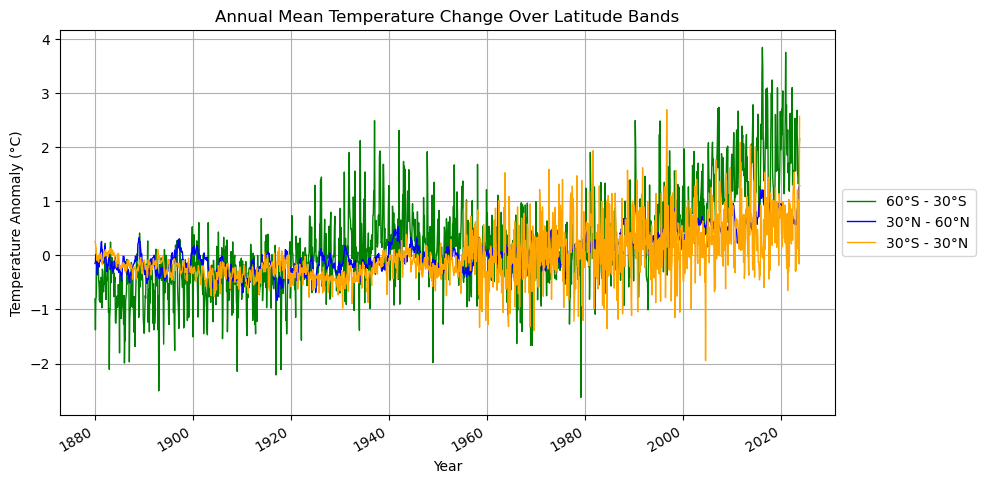

In [41]:
# Plot annual mean temperature change over three latitude bands
plt.figure(figsize=(10, 5))

# Plot green band
latitude_bands[2].plot(label='60°S - 30°S', linewidth=1, color='green')

# Plot blue band
latitude_bands[1].plot(label='30°N - 60°N', linewidth=1, color='blue')

# Plot orange band
latitude_bands[0].plot(label='30°S - 30°N', linewidth=1, color='orange')

plt.title('Annual Mean Temperature Change Over Latitude Bands')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')

# Place legend to the right
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

### Global Mean Surface Temperature Change:

In [42]:
import matplotlib.pyplot as plt
import xarray as xr

In [43]:
# Load GISTEMP data
file = "gistemp1200_GHCNv4_ERSSTv5.nc"
combined_temp_ds = xr.open_dataset(file)

# Extract global mean temperature
global_mean_temp = combined_temp_ds['tempanomaly'].mean(dim=['lat', 'lon'])

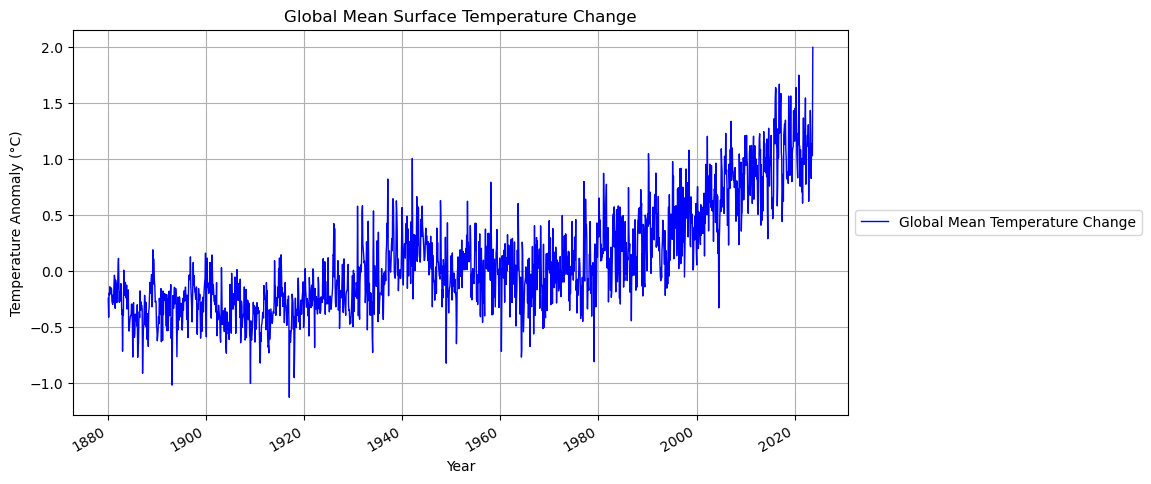

In [44]:
# Plot the global mean temperature change
plt.figure(figsize=(10, 5))
global_mean_temp.plot(label='Global Mean Temperature Change', color='b', linewidth=1)
plt.title('Global Mean Surface Temperature Change')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')

# Place legend to the right
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

### Global Temperature Mean Anomalies for Each Season (Individual Graphs):

In [45]:
import matplotlib.pyplot as plt
import xarray as xr

In [46]:
# Load GISTEMP data
file = "gistemp1200_GHCNv4_ERSSTv5.nc"
combined_temp_ds = xr.open_dataset(file)

# Resample the data to a seasonal frequency
temp_seasonal = combined_temp_ds['tempanomaly'].resample(time='QS-DEC').mean()

# Separate data for each season
winter_data = temp_seasonal.sel(time=temp_seasonal['time.season'] == 'DJF')
spring_data = temp_seasonal.sel(time=temp_seasonal['time.season'] == 'MAM')
summer_data = temp_seasonal.sel(time=temp_seasonal['time.season'] == 'JJA')
fall_data = temp_seasonal.sel(time=temp_seasonal['time.season'] == 'SON')

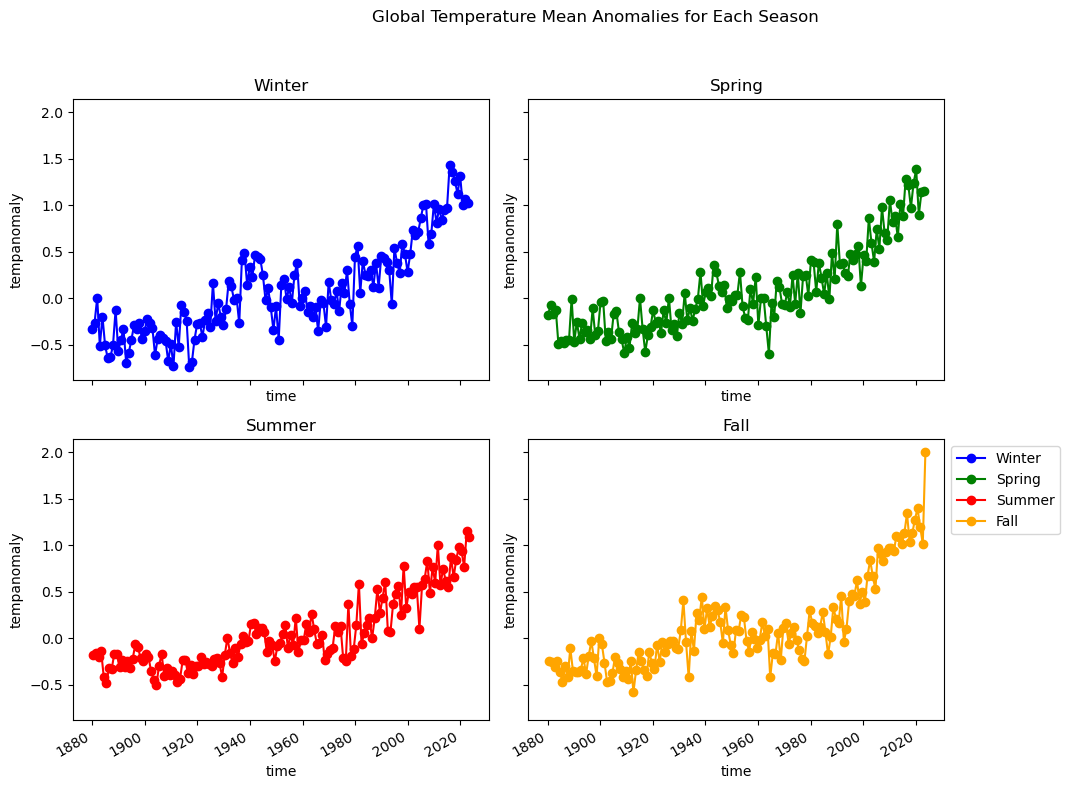

In [47]:
# Plot each season as a line graph with different colors and line thickness
fig, axes = plt.subplots(2, 2, figsize=(12, 8), sharex=True, sharey=True)
fig.suptitle('Global Temperature Mean Anomalies for Each Season')

# Winter
winter_line, = winter_data.mean(dim=['lat', 'lon']).plot.line(ax=axes[0, 0], marker='o', label='Winter', color='blue', linewidth=1.5)
axes[0, 0].set_title('Winter')

# Spring
spring_line, = spring_data.mean(dim=['lat', 'lon']).plot.line(ax=axes[0, 1], marker='o', label='Spring', color='green', linewidth=1.5)
axes[0, 1].set_title('Spring')

# Summer
summer_line, = summer_data.mean(dim=['lat', 'lon']).plot.line(ax=axes[1, 0], marker='o', label='Summer', color='red', linewidth=1.5)
axes[1, 0].set_title('Summer')

# Fall
fall_line, = fall_data.mean(dim=['lat', 'lon']).plot.line(ax=axes[1, 1], marker='o', label='Fall', color='orange', linewidth=1.5)
axes[1, 1].set_title('Fall')

# Collect handles and labels for creating a single legend
handles = [winter_line, spring_line, summer_line, fall_line]
labels = [handle.get_label() for handle in handles]

# Add a single legend outside the subplots
axes.flatten()[-1].legend(handles=handles, labels=labels, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout(rect=[0, 0, 0.9, 0.95])
plt.show()

### Global Temperature Mean Anomalies for Each Season (Single Graph):

In [97]:
import matplotlib.pyplot as plt
import xarray as xr

In [98]:
# Load GISTEMP data
file = "gistemp1200_GHCNv4_ERSSTv5.nc"
combined_temp_ds = xr.open_dataset(file)

# Resample the data to a seasonal frequency
temp_seasonal = combined_temp_ds['tempanomaly'].resample(time='QS-DEC').mean()

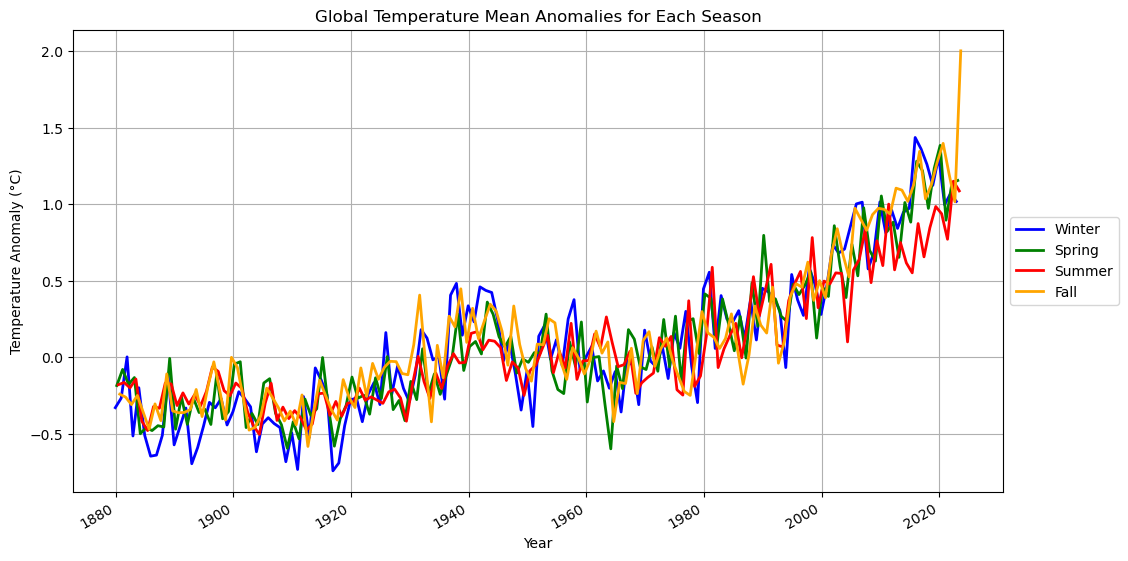

In [101]:
# Plot each season as a line graph with different colors and line thickness
plt.figure(figsize=(12, 6))

# Winter
temp_seasonal.sel(time=temp_seasonal['time.season'] == 'DJF').mean(dim=['lat', 'lon']).plot.line(label='Winter', color='blue', linewidth=2)

# Spring
temp_seasonal.sel(time=temp_seasonal['time.season'] == 'MAM').mean(dim=['lat', 'lon']).plot.line(label='Spring', color='green', linewidth=2)

# Summer
temp_seasonal.sel(time=temp_seasonal['time.season'] == 'JJA').mean(dim=['lat', 'lon']).plot.line(label='Summer', color='red', linewidth=2)

# Fall
temp_seasonal.sel(time=temp_seasonal['time.season'] == 'SON').mean(dim=['lat', 'lon']).plot.line(label='Fall', color='orange', linewidth=2)

plt.title('Global Temperature Mean Anomalies for Each Season')
plt.xlabel('Year')
plt.ylabel('Temperature Anomaly (°C)')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.show()

### Latest Month Temperature Anomaly (United States):

In [13]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr

In [14]:
# Load GISTEMP data
file = "gistemp1200_GHCNv4_ERSSTv5.nc"
combined_temp_ds = xr.open_dataset(file)

# Extract temperature data for the United States (replace lat and lon with desired coordinates)
us_temperature_data = combined_temp_ds['tempanomaly'].sel(lat=slice(24, 49), lon=slice(-125, -66))

# Select the latest month
latest_month_temp = us_temperature_data.isel(time=-1)

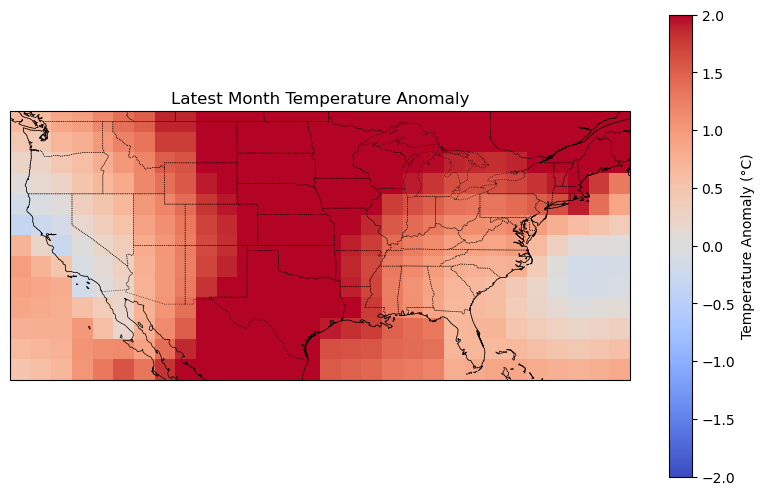

In [15]:
# Plot the static map
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(10, 6))
cax = ax.pcolormesh(latest_month_temp.lon, latest_month_temp.lat, latest_month_temp, shading='auto', cmap='coolwarm', vmin=-2, vmax=2)
fig.colorbar(cax, label='Temperature Anomaly (°C)')

# Add state borders
ax.add_feature(cfeature.STATES, linestyle=':', edgecolor='black', linewidth=0.5)

# Add coastlines
ax.add_feature(cfeature.COASTLINE, linestyle='-', edgecolor='black', linewidth=0.5)

# Set title
ax.set_title('Latest Month Temperature Anomaly')

plt.show()

### Latest Month Temperature Anomaly (Global):

In [16]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr

In [17]:
# Load GISTEMP data
file = "gistemp1200_GHCNv4_ERSSTv5.nc"
combined_temp_ds = xr.open_dataset(file)

# Extract global temperature data
global_temperature_data = combined_temp_ds['tempanomaly']

# Select the latest month
latest_month_temp_global = global_temperature_data.isel(time=-1)

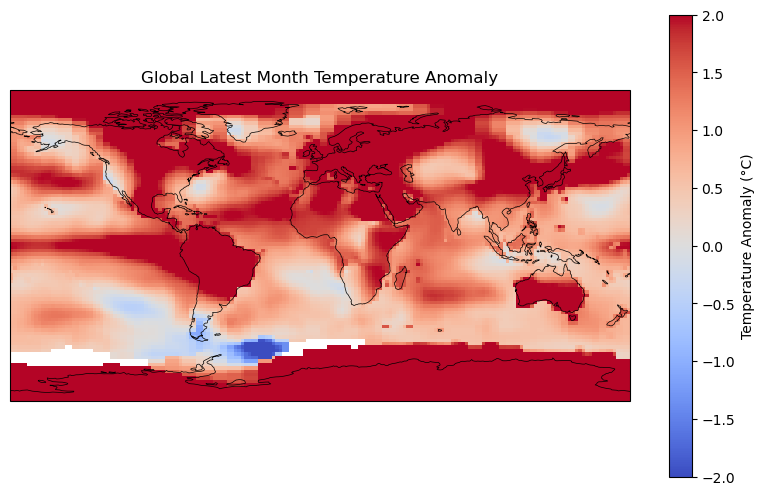

In [18]:
# Plot the static map
fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(10, 6))
cax = ax.pcolormesh(latest_month_temp_global.lon, latest_month_temp_global.lat, latest_month_temp_global, shading='auto', cmap='coolwarm', vmin=-2, vmax=2)
fig.colorbar(cax, label='Temperature Anomaly (°C)')

# Add coastlines
ax.add_feature(cfeature.COASTLINE, linestyle='-', edgecolor='black', linewidth=0.5)

# Set title
ax.set_title('Global Latest Month Temperature Anomaly')

plt.show()

### Seasonal Means (Global):

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# Read in GISTEMP data as dataframe, skip header, set year as index
gistemp_file = 'parameters/GLB.Ts+dSST.csv'
df_full = pd.read_csv(gistemp_file, header=1)
df_full = df_full.set_index('Year')

In [10]:
# Drop non-monthly columns
df = df_full.iloc[:, :12]

# Drop 2023 (incomplete)
df = df.head(len(df) - 1)

# Convert to floats
df = df.astype(float)

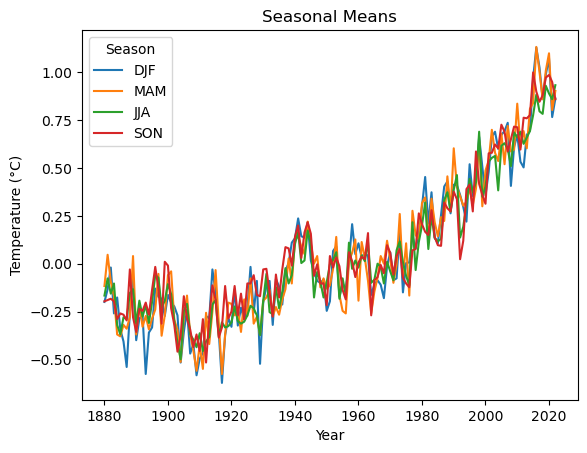

In [11]:
# Plot the four line plots for the four seasons on one graph
plt.plot(df[['Dec', 'Jan', 'Feb']].mean(axis=1), label="DJF")
plt.plot(df[['Mar', 'Apr', 'May']].mean(axis=1), label="MAM")
plt.plot(df[['Jun', 'Jul', 'Aug']].mean(axis=1), label="JJA")
plt.plot(df[['Sep', 'Oct', 'Nov']].mean(axis=1), label="SON")

plt.title('Seasonal Means')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend(title='Season', loc='upper left')
plt.show()

### Seasonal Means (Northern Hemisphere):

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read in GISTEMP data as dataframe, skip header, set year as index
gistemp_file = 'parameters/NH.Ts+dSST.csv'
df_full = pd.read_csv(gistemp_file, header=1)
df_full = df_full.set_index('Year')

In [ ]:
# Drop non-monthly columns
df = df_full.iloc[:, :12]

# Drop 2023 (incomplete)
df = df.head(len(df) - 1)

# Convert to floats
df = df.astype(float)

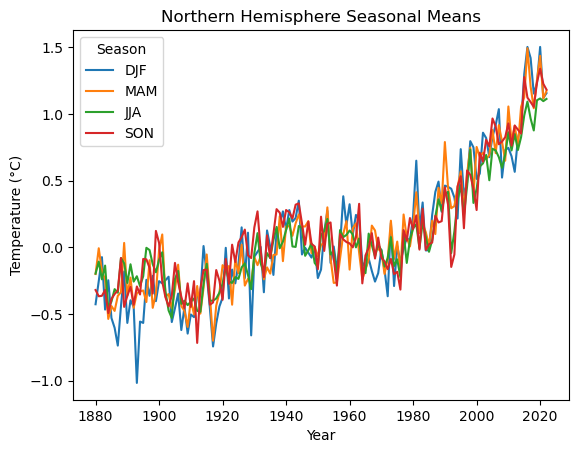

In [5]:
# Plot the four line plots for the four seasons on one graph (Northern Hemisphere)
plt.plot(df[['Dec', 'Jan', 'Feb']].mean(axis=1), label="DJF")
plt.plot(df[['Mar', 'Apr', 'May']].mean(axis=1), label="MAM")
plt.plot(df[['Jun', 'Jul', 'Aug']].mean(axis=1), label="JJA")
plt.plot(df[['Sep', 'Oct', 'Nov']].mean(axis=1), label="SON")

plt.title('Northern Hemisphere Seasonal Means')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend(title='Season', loc='upper left')
plt.show()

### Seasonal Means (Southern Hemisphere):

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
# Read in GISTEMP data as dataframe, skip header, set year as index
gistemp_file = 'parameters/SH.Ts+dSST.csv'
df_full = pd.read_csv(gistemp_file, header=1)
df_full = df_full.set_index('Year')

In [14]:
# Drop non-monthly columns
df = df_full.iloc[:, :12]

# Drop 2023 (incomplete)
df = df.head(len(df) - 1)

# Convert to floats
df = df.astype(float)

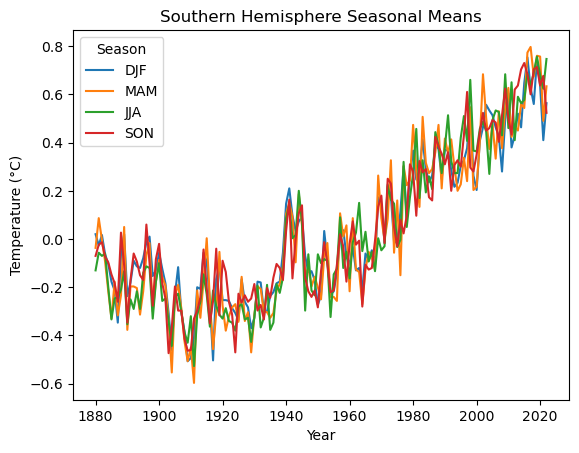

In [15]:
# Plot the four line plots for the four seasons on one graph (Southern Hemisphere)
plt.plot(df[['Dec', 'Jan', 'Feb']].mean(axis=1), label="DJF")
plt.plot(df[['Mar', 'Apr', 'May']].mean(axis=1), label="MAM")
plt.plot(df[['Jun', 'Jul', 'Aug']].mean(axis=1), label="JJA")
plt.plot(df[['Sep', 'Oct', 'Nov']].mean(axis=1), label="SON")

plt.title('Southern Hemisphere Seasonal Means')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.legend(title='Season', loc='upper left')
plt.show()

### United States Latest Month Temperature Anomaly (Dropdown):

In [19]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import ipywidgets as widgets
from IPython.display import display

In [20]:
# Load GISTEMP data
file = "gistemp1200_GHCNv4_ERSSTv5.nc"
combined_temp_ds = xr.open_dataset(file)

# Extract temperature data for the United States (replace lat and lon with desired coordinates)
us_temperature_data = combined_temp_ds['tempanomaly'].sel(lat=slice(24, 49), lon=slice(-125, -66))

# Select the latest month
latest_month_temp = us_temperature_data.isel(time=-1)

In [21]:
# Create dropdown widgets
cmap_dropdown = widgets.Dropdown(
    options=['viridis', 'plasma', 'coolwarm', 'RdBu_r'],
    value='coolwarm',
    description='Colormap:'
)

vmin_slider = widgets.FloatSlider(
    value=-2,
    min=-5,
    max=5,
    step=0.1,
    description='Min Temperature (°C):'
)

vmax_slider = widgets.FloatSlider(
    value=2,
    min=-5,
    max=5,
    step=0.1,
    description='Max Temperature (°C):'
)

In [22]:
# Define function to update the plot based on user input
def update_plot(colormap, vmin, vmax):
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(10, 6))
    cax = ax.pcolormesh(latest_month_temp.lon, latest_month_temp.lat, latest_month_temp, shading='auto', cmap=colormap, vmin=vmin, vmax=vmax)
    fig.colorbar(cax, label='Temperature Anomaly (°C)')
    ax.add_feature(cfeature.STATES, linestyle=':', edgecolor='black', linewidth=0.5)
    ax.add_feature(cfeature.COASTLINE, linestyle='-', edgecolor='black', linewidth=0.5)
    ax.set_title('Latest Month Temperature Anomaly (United States)')
    plt.show()

In [23]:
# Create interactive widget with the update function
interactive_plot = widgets.interactive(update_plot, colormap=cmap_dropdown, vmin=vmin_slider, vmax=vmax_slider)

# Display the interactive plot
display(interactive_plot)

interactive(children=(Dropdown(description='Colormap:', index=2, options=('viridis', 'plasma', 'coolwarm', 'Rd…

### Global Latest Month Temperature Anomaly (Dropdown):

In [24]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import ipywidgets as widgets
from IPython.display import display

In [25]:
# Load GISTEMP data
file = "gistemp1200_GHCNv4_ERSSTv5.nc"
combined_temp_ds = xr.open_dataset(file)

# Extract global temperature data
global_temperature_data = combined_temp_ds['tempanomaly']

# Select the latest month
latest_month_temp_global = global_temperature_data.isel(time=-1)

In [26]:
# Dropdown for colormap
colormap_dropdown = widgets.Dropdown(
    options=['coolwarm', 'viridis', 'plasma', 'inferno'],
    value='coolwarm',
    description='Colormap:'
)

# Dropdown for temperature anomaly range
temp_range_dropdown = widgets.FloatRangeSlider(
    value=[-2, 2],
    min=-5, max=5, step=0.1,
    description='Temp Range:'
)

In [27]:
# Function to update the plot
def update_plot(colormap, temp_range):
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()}, figsize=(10, 6))
    cax = ax.pcolormesh(latest_month_temp_global.lon, latest_month_temp_global.lat, latest_month_temp_global, shading='auto', cmap=colormap, vmin=temp_range[0], vmax=temp_range[1])
    fig.colorbar(cax, label='Temperature Anomaly (°C)')
    ax.add_feature(cfeature.COASTLINE, linestyle='-', edgecolor='black', linewidth=0.5)
    ax.set_title('Global Latest Month Temperature Anomaly')
    plt.show()

In [28]:
# Create interactive widgets
interactive_plot = widgets.interactive(update_plot, colormap=colormap_dropdown, temp_range=temp_range_dropdown)

# Display the interactive plot
display(interactive_plot)

interactive(children=(Dropdown(description='Colormap:', options=('coolwarm', 'viridis', 'plasma', 'inferno'), …

### Global Temperature Anomalies:

In [29]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np
import pandas as pd
import ipywidgets as widgets
from IPython.display import display

In [30]:
# Load GISTEMP data
file = "gistemp1200_GHCNv4_ERSSTv5.nc"
combined_temp_ds = xr.open_dataset(file)

ds_latest_month = combined_temp_ds.sel(time=combined_temp_ds.time[-1])

In [31]:
# Dropdown for colormap
colormap_dropdown = widgets.Dropdown(
    options=['coolwarm', 'viridis', 'plasma', 'inferno'],
    value='coolwarm',
    description='Colormap:'
)

# Dropdown for temperature anomaly range
temp_range_dropdown = widgets.FloatRangeSlider(
    value=[-2, 2],
    min=-5, max=5, step=0.1,
    description='Temp Range:'
)

In [32]:
# Function to update the plot
def update_plot(colormap, temp_range):
    fig, ax = plt.subplots(subplot_kw={'projection': ccrs.Robinson()})
    ds_latest_month.tempanomaly.plot(transform=ccrs.PlateCarree(), cbar_kwargs={'shrink': 0.6}, cmap=colormap, vmin=temp_range[0], vmax=temp_range[1])
    ax.coastlines()
    ax.set_title('Temperature Anomalies')
    plt.show()

In [33]:
# Create interactive widgets
interactive_plot = widgets.interactive(update_plot, colormap=colormap_dropdown, temp_range=temp_range_dropdown)

# Display the interactive plot
display(interactive_plot)

interactive(children=(Dropdown(description='Colormap:', options=('coolwarm', 'viridis', 'plasma', 'inferno'), …